# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [19]:
#import numpy and pandas
import numpy as np 
import pandas as pd 



# Challenge 1 - The `stats` Submodule

This submodule contains statistical functions for conducting hypothesis tests, producing various distributions and other useful tools. Let's examine this submodule using the KickStarter dataset. Load the data using the `ks-projects-201801.csv` file

In [20]:
ks_projects = pd.read_csv('../ks-projects-201801.csv')
ks_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 31.8+ MB


Now print the `head` function to examine the dataset.

In [21]:
ks_projects.head()


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Import the `mode` function from `scipy.stats` and find the mode of the `country` and `currency` column.

In [22]:
from scipy.stats import mode

countries_mode = mode(ks_projects['country'])
currency_mode = mode(ks_projects['currency'])

print(f'The most frequent contry is {countries_mode} and the most frequent currency is {currency_mode}')

The most frequent contry is ModeResult(mode=array(['US'], dtype=object), count=array([292627])) and the most frequent currency is ModeResult(mode=array(['USD'], dtype=object), count=array([295365]))


The trimmed mean is a function that computes the mean of the data with observations removed. The most common way to compute a trimmed mean is by specifying a percentage and then removing elements from both ends. However, we can also specify a threshold on both ends. The goal of this function is to create a more robust method of computing the mean that is less influenced by outliers. SciPy contains a function called `tmean` for computing the trimmed mean. 

In the cell below, import the `tmean` function and then find the 75th percentile of the `goal` column. Compute the trimmed mean between 0 and the 75th percentile of the column. Read more about the `tmean` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tmean.html#scipy.stats.tmean).

In [23]:
from scipy.stats import tmean

# scipy.stats.tmean(a, limits=None, inclusive=True, True, axis=None)
    # a - list
    # limits - choose where to trim the list
        # None - don't remove any elements
        # (lower_limit, upper_limit) - remove elements < the lower_ limit and > upper_limit
        # inclusive=(True, True) - wether to include (True) the values equal to the limit or to exclude it (False)
        # axis


tmean(ks_projects['goal'], (0, np.quantile(ks_projects['goal'], 0.75) ))


4874.150287106898

#### SciPy contains various statistical tests. One of the tests is Fisher's exact test. This test is used for contingency tables. 

The test originates from the "Lady Tasting Tea" experiment. In 1935, Fisher published the results of the experiment in his book. The experiment was based on a claim by Muriel Bristol that she can taste whether tea or milk was first poured into the cup. Fisher devised this test to disprove her claim. The null hypothesis is that the treatments do not affect outcomes, while the alternative hypothesis is that the treatment does affect outcome. To read more about Fisher's exact test, see:

* [Wikipedia's explanation](http://b.link/test61)
* [A cool deep explanation](http://b.link/handbook47)
* [An explanation with some important Fisher's considerations](http://b.link/significance76)

Let's perform Fisher's exact test on our KickStarter data. We intend to test the hypothesis that the choice of currency has an impact on meeting the pledge goal. We'll start by creating two derived columns in our dataframe. The first will contain 1 if the amount of money in `usd_pledged_real` is greater than the amount of money in `usd_goal_real`. We can compute this by using the `np.where` function. If the amount in one column is greater than the other, enter a value of 1, otherwise enter a value of zero. Add this column to the dataframe and name it `goal_met`.

In [24]:
ks_projects['goal_met'] = np.where(ks_projects['usd_pledged_real'] > ks_projects['usd_goal_real'], 1, 0)

print(ks_projects[['usd_pledged_real','usd_goal_real','goal_met']].head())

usd_pledged_real  usd_goal_real  goal_met
0               0.0        1533.95         0
1            2421.0       30000.00         0
2             220.0       45000.00         0
3               1.0        5000.00         0
4            1283.0       19500.00         0


Next, create a column that checks whether the currency of the project is in US Dollars. Create a column called `usd` using the `np.where` function where if the currency is US Dollars, assign a value of 1 to the row and 0 otherwise.

In [25]:
ks_projects['usd'] = np.where(ks_projects['currency'] == "USD", 1, 0)

print(ks_projects[['currency','usd']].head())

currency  usd
0      GBP    0
1      USD    1
2      USD    1
3      USD    1
4      USD    1


Now create a contingency table using the `pd.crosstab` function in the cell below to compare the `goal_met` and `usd` columns.

Import the `fisher_exact` function from `scipy.stats` and conduct the hypothesis test on the contingency table that you have generated above. You can read more about the `fisher_exact` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html#scipy.stats.fisher_exact). The output of the function should be the odds ratio and the p-value. The p-value will provide you with the outcome of the test.

In [26]:
from scipy.stats import fisher_exact

# scipy.stats.fisher_exact(table, alternative='two-sided')
    # table - 2x2 contingency table


# Null hypothesis: The relative proportions of one variable are independent of the second variable
oddsratio, p_value = fisher_exact(pd.crosstab(ks_projects['goal_met'], ks_projects['usd']))

print(p_value)

# Since the p_value << 0.05 we can reject the null hypothesis that they are independent

9.78e-321


# Challenge 2 - The `interpolate` submodule

This submodule allows us to interpolate between two points and create a continuous distribution based on the observed data.

In the cell below, import the `interp1d` function from `scipy.interpolate` and first take a sample of 10 rows from `kickstarter`. 

**Make sure there are not duplicated values in `backers`**

In [36]:
from scipy.interpolate import interp1d

# DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)
    # n - size of sample
    # frac - fraction of the rows (or columns if axis=1) to use as the sample

sample = ks_projects.sample(n=10,random_state=15)
sample

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_met,usd
375853,985623847,NANO: A Four-Part Science Fiction Book Series,Fiction,Publishing,USD,2014-08-17,3000.0,2014-07-18 04:26:49,400.00,failed,12,US,400.00,400.00,3000.00,0,1
135526,1688199073,Treplev,Theater,Theater,MXN,2016-12-28,80000.0,2016-11-24 20:48:46,81843.58,successful,92,MX,394.26,3962.41,3873.15,1,0
335496,77905976,"shalloboi- 'field of flowers' 7"" set",Indie Rock,Music,USD,2012-11-30,1500.0,2012-10-31 17:02:52,1546.00,successful,39,US,1546.00,1546.00,1500.00,1,1
345258,828732017,Indulge Desserts Cake Boutique,Small Batch,Food,USD,2017-10-31,35000.0,2017-10-01 15:04:58,5761.00,failed,16,US,60.00,5761.00,35000.00,0,1
96412,148990004,Head Above Water,Shorts,Film & Video,USD,2016-03-05,4000.0,2016-02-04 17:42:31,4366.00,successful,54,US,4366.00,4366.00,4000.00,1,1
317492,687261521,Bake Your Own Basius - Basing Pads for Wargame...,Tabletop Games,Games,GBP,2013-09-15,1500.0,2013-08-21 19:24:29,23594.00,successful,287,GB,36919.22,37796.36,2402.92,1,0
44693,1226994920,A Collection of Dad Poems,Poetry,Publishing,USD,2016-02-18,850.0,2016-01-19 15:59:54,8051.69,successful,273,US,8051.69,8051.69,850.00,1,1
50380,125659466,Comics on Comics Season 3,Webseries,Film & Video,USD,2010-06-27,10000.0,2010-03-29 07:39:27,95.00,failed,5,US,95.00,95.00,10000.00,0,1
325914,729880989,Eunomi,Video Games,Games,USD,2012-06-07,25000.0,2012-05-08 15:26:38,2684.00,failed,43,US,2684.00,2684.00,25000.00,0,1
111172,1564852784,"Aniana - Solo Debut LP ""Chapters""",Music,Music,USD,2016-04-29,5000.0,2016-03-30 16:39:44,5196.00,successful,0,"N,0""",NaN,5196.00,5000.00,1,1


Next, create a linear interpolation of `usd_pledged_real` as a function of the `backers`. Create a function `f` that generates a linear interpolation of `usd_pledged_real` as predicted by the amount of `backers`.

In [37]:
# scipy.interpolate.interp1d(x, y, kind='linear', axis=- 1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)

f = interp1d(sample['backers'], list(sample['usd_pledged_real']))
f

Now create a new variable called `x_new`. This variable will contain all integers between the minimum number of backers in our sample and the maximum number of backers. The goal here is to take the dataset that contains few obeservations due to sampling and fill all observations with a value using the interpolation function. 

Hint: one option is the `np.arange` function.

In [38]:
x_new = np.arange(min(sample['backers']), max(sample['backers']), 1)
y = f(x_new)
print(y)

[ 5196.          4175.8         3155.6         2135.4
  1115.2           95.           138.57142857   182.14285714
   225.71428571   269.28571429   312.85714286   356.42857143
   400.          1740.25        3080.5         4420.75
  5761.          5577.73913043  5394.47826087  5211.2173913
  5027.95652174  4844.69565217  4661.43478261  4478.17391304
  4294.91304348  4111.65217391  3928.39130435  3745.13043478
  3561.86956522  3378.60869565  3195.34782609  3012.08695652
  2828.82608696  2645.56521739  2462.30434783  2279.04347826
  2095.7826087   1912.52173913  1729.26086957  1546.
  1830.5         2115.          2399.5         2684.
  2836.90909091  2989.81818182  3142.72727273  3295.63636364
  3448.54545455  3601.45454545  3754.36363636  3907.27272727
  4060.18181818  4213.09090909  4366.          4355.37921053
  4344.75842105  4334.13763158  4323.51684211  4312.89605263
  4302.27526316  4291.65447368  4281.03368421  4270.41289474
  4259.79210526  4249.17131579  4238.55052632  4227.92

Plot function `f` for all values of `x_new`. Run the code below.

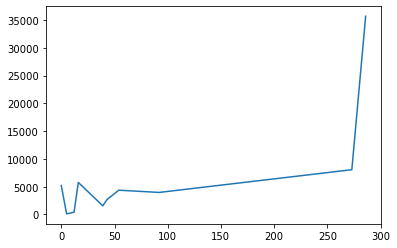

In [39]:
# Run this code:

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_new, f(x_new))

Next create a function that will generate a cubic interpolation function. Name the function `g`.

In [40]:
g = interp1d(sample['backers'], list(sample['usd_pledged_real']), kind='cubic', bounds_error=False, fill_value='extrapolate')
g

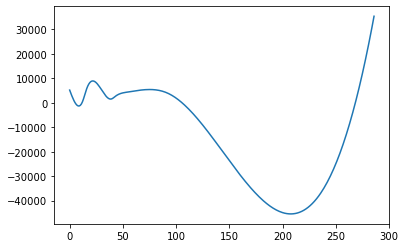

In [41]:
# Run this code:

plt.plot(x_new, g(x_new))

# Bonus Challenge - The Binomial Distribution

The binomial distribution allows us to calculate the probability of k successes in n trials for a random variable with two possible outcomes (which we typically label success and failure).  

The probability of success is typically denoted by p and the probability of failure is denoted by 1-p.

The `scipy.stats` submodule contains a `binom` function for computing the probabilites of a random variable with the binomial distribution. You may read more about the binomial distribution [here](http://b.link/binomial55)

* In the cell below, compute the probability that a dice lands on 5 exactly 3 times in 8 tries.


In [42]:
# Your code here:



* Do a simulation for the last event: do a function that simulate 8 tries and return a 1 if the result is 5 exactly 3 times and 0 if not. Now launch your simulation.

In [43]:
# Your code here:


* Launch 10 simulations and represent the result in a bar plot. Now launch 1000 simulations and represent it. What do you see?

In [44]:
# Your code here:
